In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
!pip install scikit-learn==1.4.1.post1

In [3]:
heart_data = pd.read_csv('Heart Attack.csv')

In [4]:
heart_data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
heart_data.shape

(1319, 9)

In [6]:
heart_data.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [7]:
heart_data['class'].replace(['negative', 'positive'], [0, 1], inplace=True)

In [8]:
heart_data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [9]:
heart_data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [10]:
X = heart_data.drop(columns='class', axis=1)
X.astype('float')
transform = StandardScaler()
X = transform.fit_transform(X)

In [11]:
Y = heart_data['class'].to_numpy()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1055, 8)
(1055,)
(264, 8)
(264,)


### Confusion Matrix Function

In [14]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No Heart Attack', 'Heart Attack']); ax.yaxis.set_ticklabels(['No Heart Attack', 'Heart Attack']) 
    plt.show()

### Logistic Regression

In [15]:
parameters = {
    'C': [0.01,0.1,1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

In [16]:
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [17]:
print("Best Parameters: ", logreg_cv.best_params_)
print("Accuracy Score: ", logreg_cv.best_score_)

Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy Score:  0.7981132075471697


In [18]:
best_model = logreg_cv.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print(test_accuracy)

0.7651515151515151


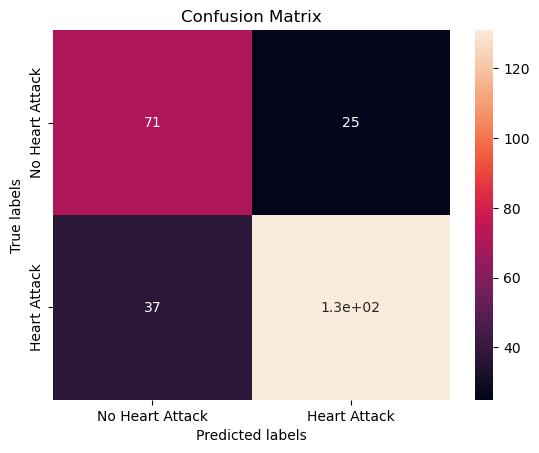

In [19]:
yhat = logreg_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

### Decision Tree

In [20]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

tree = DecisionTreeClassifier()

In [21]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [22]:
print('Best Parameters: ', tree_cv.best_params_)
print('Accuracy Score: ', tree_cv.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy Score:  0.9886343216531894


In [23]:
best_model = tree_cv.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print(test_accuracy)

1.0


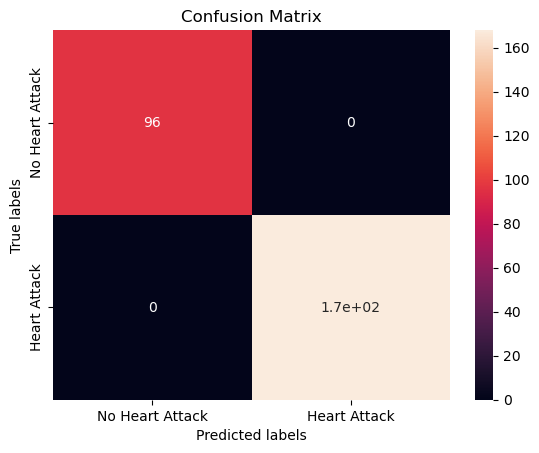

In [24]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [25]:
parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

KNN = KNeighborsClassifier()

In [26]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [27]:
print('Best Parameters: ', knn_cv.best_params_)
print('Accuracy Score: ', knn_cv.best_score_)

Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
Accuracy Score:  0.6891284815813118


In [28]:
best_model = knn_cv.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print(test_accuracy)

0.6590909090909091


In [29]:
classifier = [logreg_cv, tree_cv, knn_cv]
for clf in classifier:
    clf.fit(X, Y)
    best_es = clf.best_estimator_
    mean_accuracy = clf.best_score_
    print(f"{clf.estimator.__class__.__name__} with GridSearchCV: Best Estimator = {best_es}, Mean Accuracy = {mean_accuracy:.4f}")


LogisticRegression with GridSearchCV: Best Estimator = LogisticRegression(C=1), Mean Accuracy = 0.7900
DecisionTreeClassifier with GridSearchCV: Best Estimator = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4), Mean Accuracy = 0.9909
KNeighborsClassifier with GridSearchCV: Best Estimator = KNeighborsClassifier(n_neighbors=9, p=1), Mean Accuracy = 0.6687


In [30]:
best_model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter='best')
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

In [31]:
yhat = best_model.predict(x_test)
test_score = accuracy_score(y_test, yhat)
print(test_score)

1.0


In [32]:
import pickle

In [33]:
pickle.dump(best_model, open('heart_model.pkl', 'wb'))

In [34]:
heart_model = pickle.load(open('heart_model.pkl', 'rb'))
heart_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)

In [35]:
pickle.dump(heart_model, open('heart_model.pkl', 'wb'))